### Slade Brooks
### M13801712
### brooksl@mail.uc.edu
### Final Exam

In [37]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from scipy import integrate as integrate
# import custom modules
sys.path.append("..//lib//")
import pyvot

# Question 1

In [38]:
# create A matrix
A = np.array([[31, 3, 5, 6, 9, 10],
              [1, 33, 5, 6, 9, 10],
              [1, 3, 35, 6, 9, 10],
              [1, 3, 5, 36, 9, 10],
              [1, 3, 5, 6, 39, 10],
              [1, 3, 5, 6, 9, 40]])

## Part A

In [39]:
# find b from Ax=b so that x is all 5s
x = np.array([[5],[5],[5],[5],[5],[5]])
b = np.dot(A.copy(), x.copy())

print("The right side matrix b such that x is all 5s is: \n", b)

The right side matrix b such that x is all 5s is: 
 [[320]
 [320]
 [320]
 [320]
 [320]
 [320]]


## Part B

In [40]:
# solve Ax=b with gausspivot
x = pyvot.gaussPivot(A.copy(), b.copy())

# print it
print("The solution x = \n", x.copy())

The solution x = 
 [[5]
 [5]
 [5]
 [5]
 [5]
 [5]]


## Part C

In [41]:
# print solution
print("The solution x = \n", x.copy())

# get residual and show it is 0 (solve Ax=b -> Ax-b = 0)
res = np.linalg.norm(np.dot(A.copy(), x.copy()) - b.copy())
print("The residual is:", res)

The solution x = 
 [[5]
 [5]
 [5]
 [5]
 [5]
 [5]]
The residual is: 0.0


We know that this x matrix is a solution because the residual of the Ax - B calculation is so small. The residual is 0, therefore this matrix must be the solution. (this is because Ax=B, so Ax-B must be 0 for a correct solution)

# Question 2

## Part A

In [42]:
# compute eigensystem
[vals, vecs] = np.linalg.eig(A.copy())

print("The eigenvalues are: ", vals)
print("The eigenvectors are: \n", vecs)

The eigenvalues are:  [30. 64. 30. 30. 30. 30.]
The eigenvectors are: 
 [[-0.99771219  0.40824829  0.5626329  -0.56329077 -0.1919516   0.17461255]
 [ 0.0302337   0.40824829  0.80263683  0.55112017 -0.23417387 -0.00694525]
 [ 0.0302337   0.40824829 -0.09901811  0.5544123  -0.28738022 -0.5342004 ]
 [ 0.0302337   0.40824829 -0.09901811 -0.15448525  0.55083436 -0.4999621 ]
 [ 0.0302337   0.40824829 -0.09901811 -0.15448525 -0.58289951 -0.10900671]
 [ 0.0302337   0.40824829 -0.09901811 -0.15448525  0.42724637  0.64980581]]


## Part B

In [43]:
# verify eigensystem - Ax = lambdax for each vector/value (x vector, labmda value)
for i in range(len(A)):
    Ax = np.dot(A.copy(), vecs[:,i])
    lambdax = np.dot(vals[i], vecs[:,i])
    print((Ax - lambdax).round())

[0. 0. 0. 0. 0. 0.]
[-0.  0.  0.  0.  0.  0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[ 0.  0.  0. -0.  0. -0.]
[-0. -0. -0. -0. -0.  0.]


An eigensystem is defined as Ax = lambdax where x is an eigenvector and lambda is the corresponding eigenvalue. We can verify the solution by showing that Ax-lambdax is 0 for each eigenvector/value combination.

# Question 3

In [44]:
# create f(x)
def f(x): return 6*np.sin((2*np.pi*x)/9 + np.pi/8) - 1.5*np.cos((4*np.pi*x)/5)

## Part A

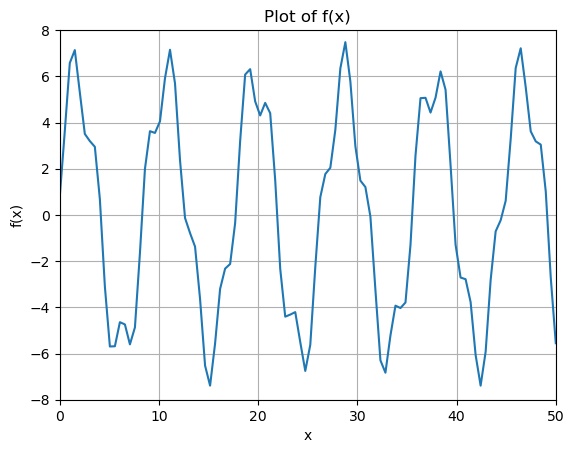

In [45]:
# set up range of vals
xs = np.linspace(0, 50, 100)

# plot function
plt.plot(xs, f(xs))
plt.xlabel("x")
plt.grid()
plt.ylabel("f(x)")
plt.title("Plot of f(x)")
plt.xlim([0, 50])
plt.ylim([-8, 8])
plt.show()

## Part B

In [46]:
# find first root range with rootsearch
a, b = pyvot.rootsearch(f, 0.01, 50, 0.01)

# also find ranges of next 2 roots
a1, b1 = pyvot.rootsearch(f, b, 50, 0.01)
a2, b2 = pyvot.rootsearch(f, b1, 50, 0.01)
a3, b3 = pyvot.rootsearch(f, b2, 50, 0.01)

# use bisection to find roots at each point
r = pyvot.bisection(f, a, b)
r1 = pyvot.bisection(f, a1, b1)
r2 = pyvot.bisection(f, a2, b2)
r3 = pyvot.bisection(f, a3, b3)

# print roots
print("The first 4 positive roots are: {0:.6f}, {1:.6f}, {2:.6f}, and {3:.6f}".format(r, r1, r2, r3))

The first 4 positive roots are: 4.138612, 8.291628, 12.583711, and 17.736397


## Part C

In [47]:
# make list of roots
roots = [r, r1, r2, r3]

# find value of function at each root
vals = [f(r).round() for r in roots]

# print each value - if val is 0 then it is a root
print("The values at each root are:", vals)

The values at each root are: [0.0, 0.0, -0.0, 0.0]


## Part D

In [48]:
# create function again with lambda
f = lambda x: 6*np.sin((2*np.pi*x)/9 + np.pi/8) - 1.5*np.cos((4*np.pi*x)/5)

# set integration lims
a = 0
b = r

# do integration with scipy
ans, err = integrate.quad(f, a, b)

# print answer
print("The integral of f(x) from 0 to {0:.3f} is {1:.6f}".format(r, ans))
print("The error is {0:.3e}".format(err))

The integral of f(x) from 0 to 4.139 is 16.944519
The error is 4.787e-12
